<a href="https://colab.research.google.com/github/eldend/kh/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [40]:
wine.info()
#6497개의 샘플 4개의 열 모두 실숫값, 누락된 값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [39]:
wine.describe()
#최대, 최소, 평균값 등을 볼 수 있음

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [38]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() #3개의 열을 넘파이 배열로 바꿈
target = wine['class'].to_numpy()

In [37]:
from sklearn.model_selection import train_test_split
#훈련 세트와 테스트 세트를 나눔
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) #startify
    #설정 값을 지정하지 않으면 25%를 테스트 세트로 지정함 test_size=0.2일 경우 20%

Text(0, 0.5, 'Frequency')

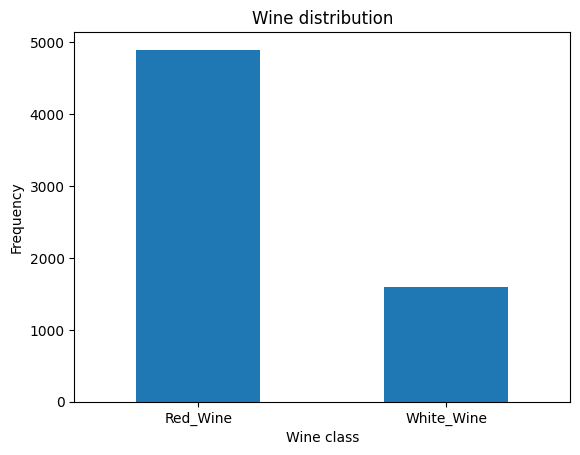

In [36]:
#책에 없는 부분
LABELS = ["Red_Wine", "White_Wine"]

import matplotlib.pyplot as plt
count_classes = pd.value_counts(wine['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Wine distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Wine class")
plt.ylabel("Frequency")

In [45]:
print(train_input.shape, test_input.shape)
#테스트 세트와 훈련 세트의 크기 확인-> 테스트 세트의 크기가 훈련세트의 크기의 20%

(5197, 1) (1300, 1)


In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

#변환 시키는 함수?
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [35]:
#모델 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
#최적화는 스킵

0.7808350971714451
0.7776923076923077


In [19]:
print(lr.coef_, lr.intercept_)
#알코올 도수와 당도가 높을 수록 화이트 와인일 가능성이 높음 pH가 높을 수록 레드 와인일 가능성이 높다고 추측

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [34]:
from sklearn.tree import DecisionTreeClassifier
#정규화 처리

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


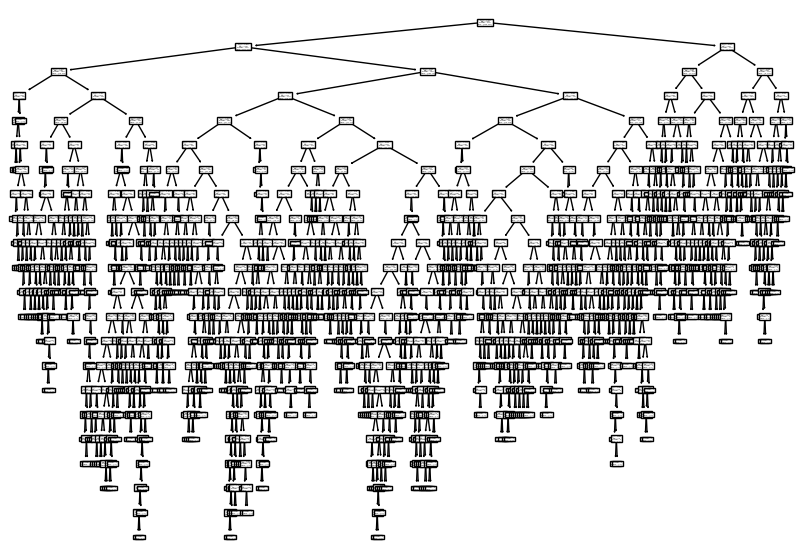

In [46]:
#결정 트리
#사이킷런의 결정 트리 알고리즘은 노드에서 찾기 전에 분할을 찾기 전에 특성의 순서를 섞음으로서 약간의 무작위성이 부여됨
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#이진트리 그리
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

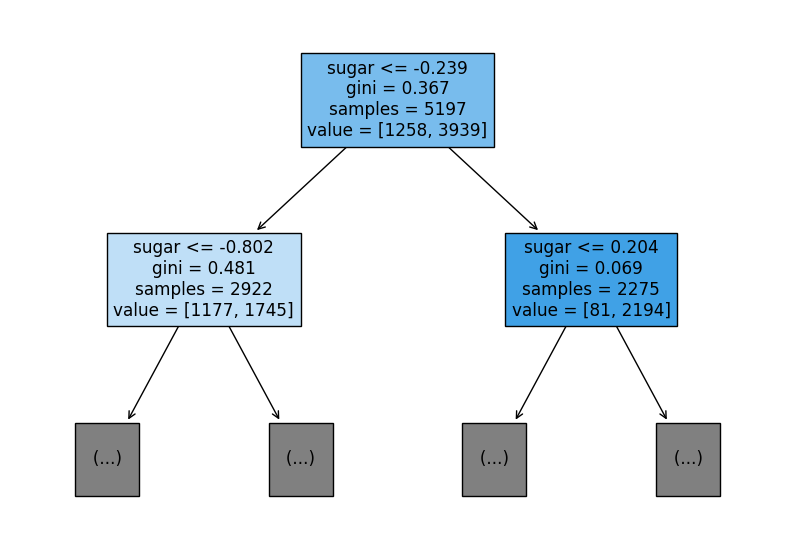

In [33]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) #max_depth는 바로 아래 자식 노드 확인
plt.show()
#설탕이 -0.239보다 작거나 같으면 오른쪽 크면 왼쪽 노드로 내려감
#value= [음성, 양성] -> 음성이 클 경우 주황색, 양성이 클 경우 파란색
#기준점이 -0.239인 이유는 분류를 했을 때 최대한 구분할 수 있도록하기 위함
#자세한 내용은 찾아보기
#분류나무 분할법칙: 분할변수(sugar), 분할점(-0.239)는 클래스의 분포를 가장 잘 구별해주는 쪽으로  정함
#gini불순도 = 1 - (음성클래스의 비율^2 + 양성클래스의 비율^2)
#1 - ((1258/5917)^2 + (3939/5197)^2) = 0.367
#1- (50/100)^2 + (50/100)^2 = 0.5
#지니불순도는 0이 될 수록 좋음
#엔트로피 불순도 = 음성클래스의 비율 + log_2(음성클래스의 비율) + 양성클래스의 비율 + log_2(양성클래스의 바율)
#엔트로피 불순도도 0이 될 수록 좋

In [32]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) #max_depth가 3일 경우 3개의 자식 노드까지(깊이 지정) -> 가지치기(깊이:0~3(총 3개의 노드가 훈련))
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#결과를 보았을 때 훈련세트의 성능은 낮아졌으나 테스트 세트의 성능은 거의 같다.(과소 적합) -> 값을 조정해주면 됨
#특성값의 스케일은 계산에 영향을 미치지 않으므로 표준화 전처리가 필요 없음->결정 트리의 장점 중 하나

0.8454877814123533
0.8415384615384616


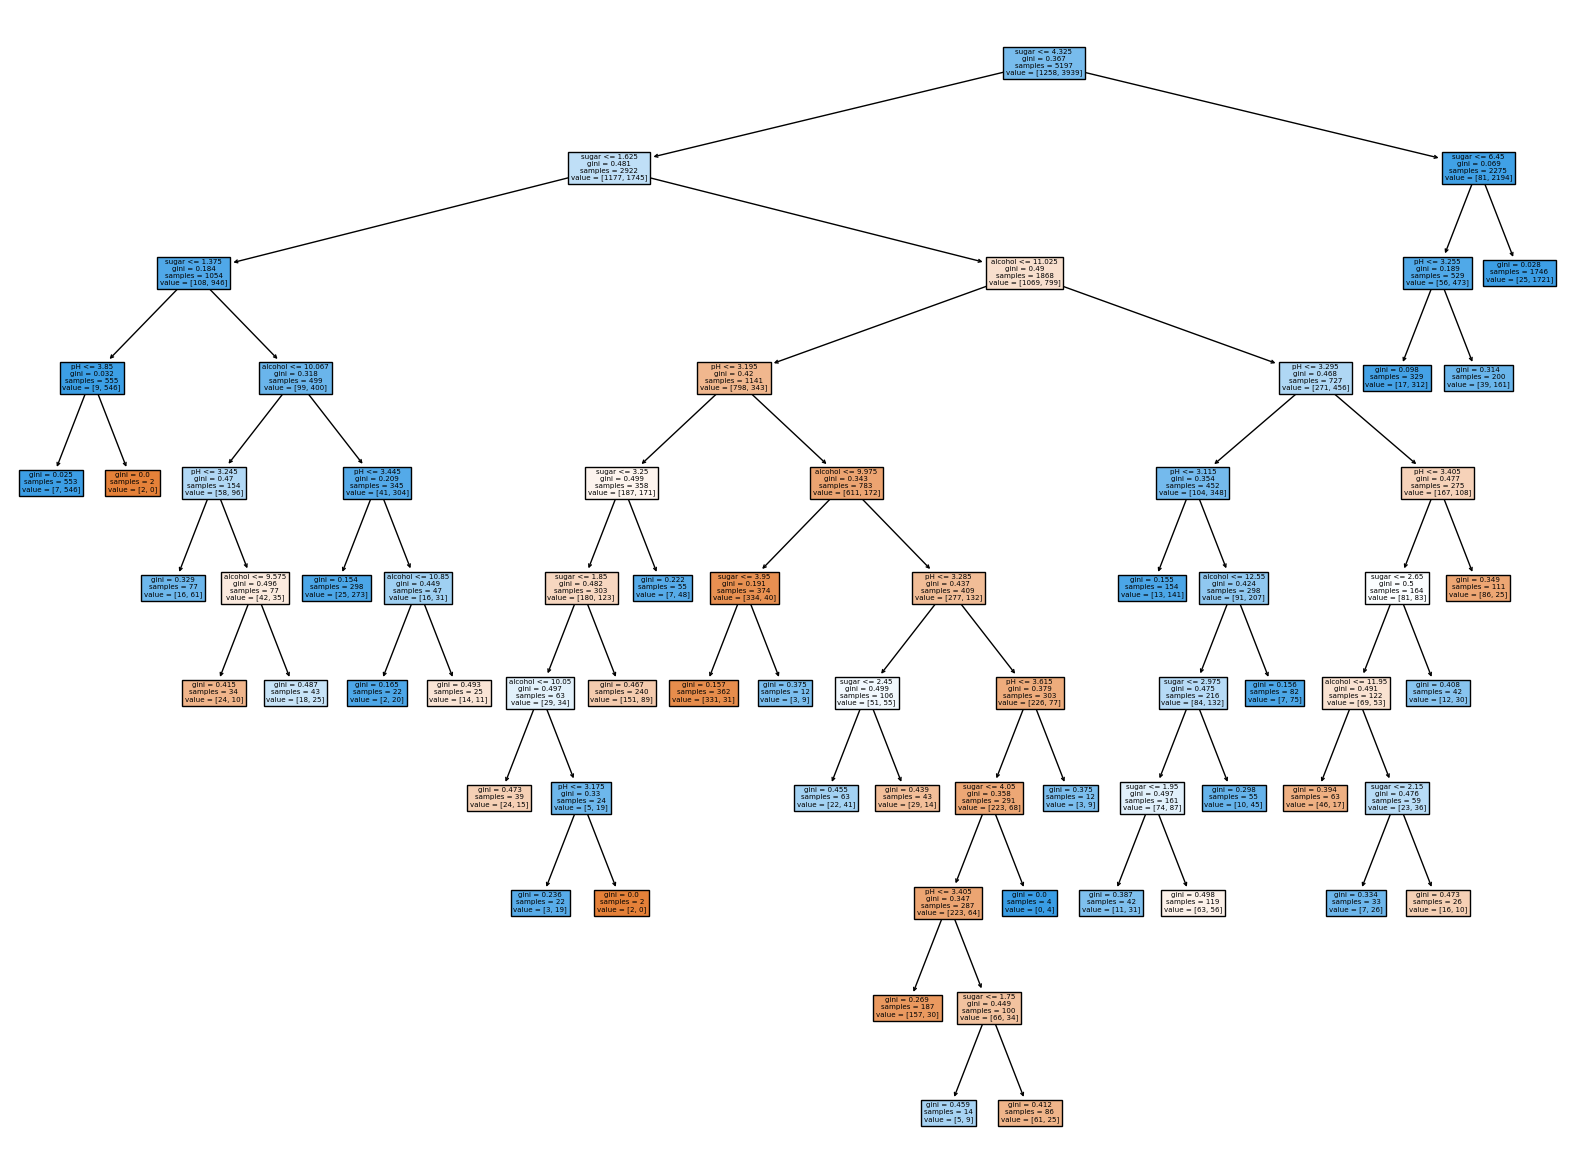

In [31]:
#특성 중요
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [26]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [28]:
#정보이득:부모 노드와 자식 노드의 불순도 차이
#결정 트링 모델은 정보 이득을 가능한 크도록 트리를 성장시킴

In [29]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


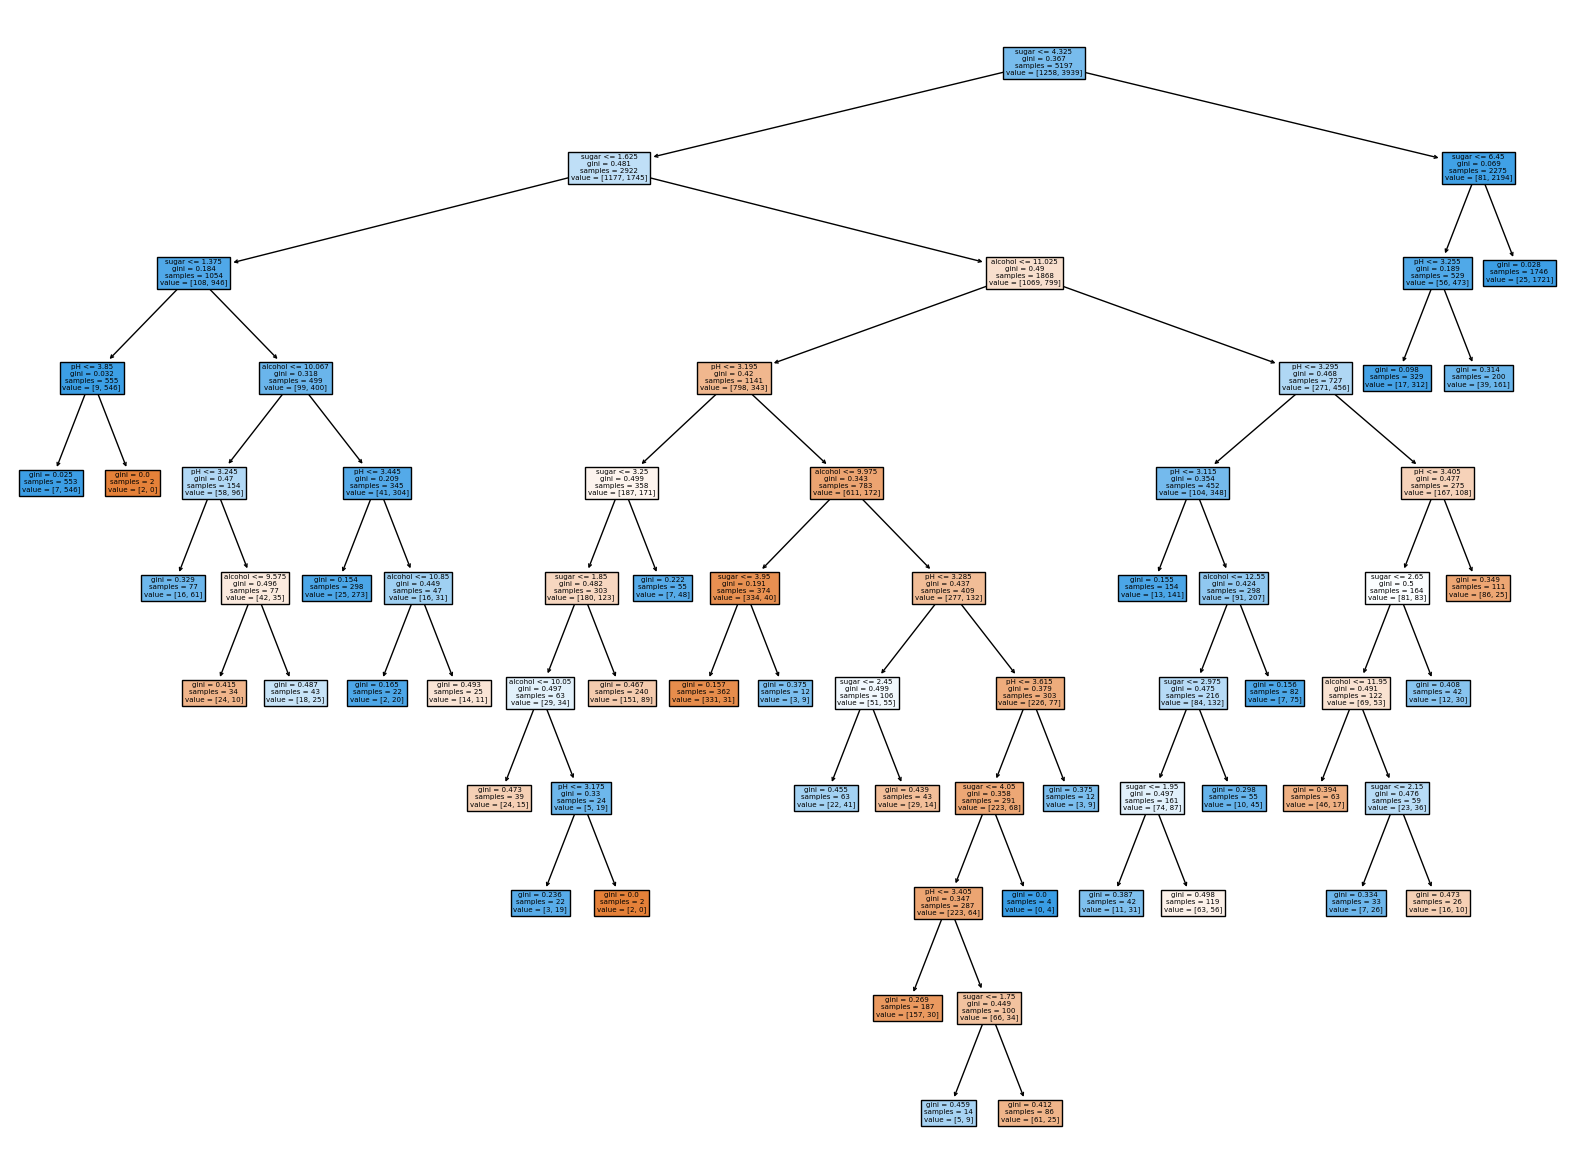

In [30]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [48]:
#세개의 특성 중 당도만 사용해서 훈련(실습)
import pandas as pd

wine1 = pd.read_csv('http://bit.ly/wine_csv_data')

data1 = wine1[[ 'sugar']].to_numpy() #3개의 열을 넘파이 배열로 바꿈
target1 = wine1['class'].to_numpy()
from sklearn.model_selection import train_test_split
#훈련 세트와 테스트 세트를 나눔
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) #startify
    #설정 값을 지정하지 않으면 25%를 테스트 세트로 지정함 test_size=0.2일 경우 20%
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

#변환 시키는 함수?
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
#모델 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
#최적화는 스킵
#당도로만 훈련할 경우 테스트 점수가 낮아짐..


0.7579372715027901
0.7376923076923076


결정트리의 장점
학습 결과를 설명하기 쉬운 알고리즘
특성값의 스케일은 계산에 영향을 미치지 않음


결정트리의 단점
계층적 구조-> 에러 발생하면 다음 단계에 영향
과대적합의 위험(최적화로 해결)